In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os
import shutil
import yaml
import warnings

import wandb
import random

import cv2
from PIL import Image


In [ ]:
!pip install ultralytics
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO
import easyocr

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to egyptian-car-plates-13 in yolov11:: 100%|██████████| 12676/12676 [00:01<00:00, 7214.53it/s]


In [2]:
!pip install roboflow
!pip install dotenv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [9]:

from roboflow import Roboflow
from dotenv import load_dotenv
import os
!pip install python-dotenv
from dotenv import load_dotenv
load_dotenv("/content/dotenv")

api_key = os.getenv("ROBOFLOW_API_KEY")


# Authenticate with your API key
rf = Roboflow(api_key=api_key)
workspace = os.getenv("workspace")
project=os.getenv("project")
# Load your project and specific dataset version
project = rf.workspace(workspace).project(project)
version = project.version(1)

# Download dataset into /content (Colab's working directory)
dataset = version.download("yolov11", location="/content")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset = version.download("yolov11")



Version export complete for yolov11 format



Extracting Dataset Version Zip to Merged-1 in yolov11:: 100%|██████████| 10308/10308 [00:02<00:00, 4267.72it/s]


In [ ]:
import wandb
from ultralytics import YOLO
import os

# Initialize wandb for tracking the experiment
wandb.init(
    # Set the wandb project where this run will be logged
    project="yolo11ocr-car-plate",

    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.0002,
        "architecture": "yolov11n.pt",
        "dataset": "/content/egyptian-car-plates-13/data.yaml",  # Update to use your dataset path
        "epochs": 20,
    }
)

# Load the YOLOv11 model
model_ocr = YOLO("/content/yolo11n.pt")  # Use the correct model architecture file

# Define checkpoint directory and create it if it doesn't exist
checkpoint_dir = '/content/yolo_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Define checkpoint filename (saved after each epoch)
checkpoint_path = os.path.join(checkpoint_dir, "yolov11_checkpoint_epoch{epoch}.pt")

# Simulate training and log it to wandb
history = model_ocr.train(
    data='/content/egyptian-car-plates-13/data.yaml',  # Path to your data configuration file
    epochs=50,  # Number of epochs for training
    batch=32,  # Adjust based on your GPU memory
    imgsz=640,  # Image size (adjust as needed)
    cache=True,
    visualize=True,
    augment=True,
    name='yolo11n_car_plate',
    save=True,  # Ensure that weights are saved after each epoch
    save_period=1,  # Save weights after each epoch
    project="yolo11ocr-car-plate",  # Name of the wandb project
    save_dir=checkpoint_dir  # Specify the checkpoint directory
)

# End the wandb run after training is complete
wandb.finish()


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11n.pt, data=/content/egyptian-car-plates-13/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=1, cache=True, device=None, workers=8, project=yolo11ocr-car-plate, name=yolo11n_car_plate2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 101MB/s]

Overriding model.yaml nc=80 with nc=38

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

YOLO11n summary: 181 layers, 2,597,250 parameters, 2,597,234 gradients, 6.5 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 338.6±144.6 MB/s, size: 9.8 KB)


train: Scanning /content/egyptian-car-plates-13/train/labels... 5216 images, 4 backgrounds, 0 corrupt: 100%|██████████| 5216/5216 [00:02<00:00, 2117.13it/s]


train: New cache created: /content/egyptian-car-plates-13/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (6.0GB RAM): 100%|██████████| 5216/5216 [00:09<00:00, 542.33it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 266.0±103.4 MB/s, size: 8.6 KB)


val: Scanning /content/egyptian-car-plates-13/valid/labels... 745 images, 0 backgrounds, 0 corrupt: 100%|██████████| 745/745 [00:00<00:00, 898.97it/s]

val: New cache created: /content/egyptian-car-plates-13/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.9GB RAM): 100%|██████████| 745/745 [00:03<00:00, 189.52it/s]


Plotting labels to yolo11ocr-car-plate/yolo11n_car_plate2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000238, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolo11ocr-car-plate/yolo11n_car_plate2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.59G      1.583       4.17      1.407        292        640: 100%|██████████| 163/163 [01:27<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]


                   all        745       3894      0.494      0.185      0.197      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.37G      1.342      2.225      1.293        260        640: 100%|██████████| 163/163 [01:24<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]

                   all        745       3894      0.654       0.53      0.587      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.38G      1.222      1.476       1.23        334        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]

                   all        745       3894      0.732      0.742      0.783      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.39G      1.156      1.213      1.189        286        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]

                   all        745       3894      0.773      0.788      0.863       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.41G      1.091      1.054      1.158        280        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        745       3894       0.86      0.874      0.923      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.42G      1.051     0.9723      1.133        319        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]

                   all        745       3894      0.876      0.898      0.945      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.44G      1.011      0.903      1.112        292        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]

                   all        745       3894      0.888      0.909      0.956        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.45G     0.9678      0.853       1.09        295        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        745       3894      0.916      0.933      0.969       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.47G      0.936       0.82      1.076        316        640: 100%|██████████| 163/163 [01:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.37it/s]

                   all        745       3894      0.943      0.924      0.968      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.48G     0.9133     0.7823      1.064        301        640: 100%|██████████| 163/163 [01:20<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]

                   all        745       3894      0.917      0.934      0.969      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       5.5G     0.8787     0.7457      1.051        300        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        745       3894      0.946      0.937      0.976      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.51G     0.8586     0.7114      1.043        291        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        745       3894       0.97      0.958      0.982      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.53G     0.8397     0.6978      1.038        226        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.39it/s]

                   all        745       3894      0.952      0.957      0.981      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.54G     0.8203     0.6643      1.028        330        640: 100%|██████████| 163/163 [01:20<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]

                   all        745       3894      0.966      0.967      0.985      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.55G     0.7998     0.6476       1.02        358        640: 100%|██████████| 163/163 [01:20<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]

                   all        745       3894      0.968      0.967      0.984      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.57G     0.7877     0.6324      1.015        257        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]

                   all        745       3894       0.96      0.957      0.982      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.59G     0.7724     0.6134      1.009        290        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]

                   all        745       3894      0.967      0.951      0.982      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       5.6G     0.7614     0.6049      1.008        322        640: 100%|██████████| 163/163 [01:20<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]

                   all        745       3894      0.968      0.958      0.983      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.62G     0.7407     0.5861      1.001        268        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        745       3894       0.97      0.967      0.985      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.63G     0.7379     0.5745     0.9973        343        640: 100%|██████████| 163/163 [01:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]

                   all        745       3894      0.969      0.968      0.986      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.64G     0.7391     0.5703     0.9995        284        640: 100%|██████████| 163/163 [01:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]

                   all        745       3894      0.966       0.97      0.983      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.66G     0.7133     0.5514     0.9911        288        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]

                   all        745       3894      0.975      0.968      0.985      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.67G     0.7078     0.5411     0.9858        282        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]

                   all        745       3894      0.964      0.972      0.984      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.69G     0.6958     0.5328     0.9829        241        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]

                   all        745       3894      0.976      0.973      0.985      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       5.7G     0.6873     0.5266     0.9821        306        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]

                   all        745       3894      0.975      0.973      0.984      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.72G     0.6775     0.5079     0.9782        373        640: 100%|██████████| 163/163 [01:18<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        745       3894      0.978      0.976      0.986      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.73G     0.6799     0.5086     0.9776        267        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]

                   all        745       3894      0.982      0.976      0.987      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.75G      0.665     0.5016     0.9744        243        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]

                   all        745       3894      0.975      0.975      0.986      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.76G     0.6594     0.4925     0.9714        290        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]

                   all        745       3894      0.975      0.975      0.986      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.78G     0.6532      0.485      0.968        320        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]

                   all        745       3894      0.975      0.975      0.987      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.79G     0.6469     0.4818     0.9697        298        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]

                   all        745       3894      0.977      0.978      0.987      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.81G     0.6403     0.4739     0.9629        297        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]

                   all        745       3894      0.978      0.977      0.987      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.82G     0.6301     0.4705     0.9614        261        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]

                   all        745       3894      0.976      0.981      0.987      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.84G     0.6319     0.4647     0.9612        320        640: 100%|██████████| 163/163 [01:18<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.42it/s]

                   all        745       3894       0.98      0.978      0.987      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.85G       0.62     0.4578     0.9605        270        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]

                   all        745       3894      0.978      0.979      0.987      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.87G     0.6134     0.4519     0.9548        322        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]

                   all        745       3894      0.977      0.979      0.988      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.88G     0.6085     0.4475     0.9519        256        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        745       3894       0.98      0.979      0.987      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       5.9G     0.6042      0.443     0.9511        281        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]

                   all        745       3894      0.979      0.981      0.988      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.91G      0.608     0.4459     0.9562        276        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]

                   all        745       3894      0.979       0.98      0.988      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.93G     0.5901     0.4349     0.9491        306        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]

                   all        745       3894      0.977      0.981      0.987      0.655


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.94G      1.206     0.5787      1.265        156        640: 100%|██████████| 163/163 [01:17<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]

                   all        745       3894      0.976      0.982      0.987      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.96G       1.17     0.5408      1.236        148        640: 100%|██████████| 163/163 [01:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]

                   all        745       3894      0.978      0.983      0.988       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.97G      1.155     0.5261      1.227        163        640: 100%|██████████| 163/163 [01:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.05it/s]

                   all        745       3894       0.98      0.985      0.988      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.98G      1.144     0.5151      1.222        164        640: 100%|██████████| 163/163 [01:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]

                   all        745       3894      0.978      0.987      0.987      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         6G      1.132     0.5085      1.218        155        640: 100%|██████████| 163/163 [01:15<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]

                   all        745       3894      0.979      0.985      0.987      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.01G      1.128     0.5039      1.213        160        640: 100%|██████████| 163/163 [01:13<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]

                   all        745       3894      0.977      0.985      0.987      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.03G      1.113     0.4954      1.206        168        640: 100%|██████████| 163/163 [01:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]

                   all        745       3894       0.98      0.984      0.987       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.04G      1.105     0.4902      1.201        160        640: 100%|██████████| 163/163 [01:13<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.71it/s]

                   all        745       3894       0.98      0.985      0.987      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.06G        1.1     0.4882      1.199        174        640: 100%|██████████| 163/163 [01:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]

                   all        745       3894      0.979      0.984      0.986      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.07G      1.092     0.4842      1.193        151        640: 100%|██████████| 163/163 [01:13<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]

                   all        745       3894      0.982      0.985      0.987      0.654



50 epochs completed in 1.206 hours.
Optimizer stripped from yolo11ocr-car-plate/yolo11n_car_plate2/weights/last.pt, 5.5MB
Optimizer stripped from yolo11ocr-car-plate/yolo11n_car_plate2/weights/best.pt, 5.5MB

Validating yolo11ocr-car-plate/yolo11n_car_plate2/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,589,562 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 1/12 [00:00<00:09,  1.19it/s]

In [ ]:
model_ocr.save('yolo11n_car_plate_ocr.pt')# # After training, save the model

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Ensure the directory exists
os.makedirs('/content/drive/MyDrive/yolo11_models', exist_ok=True)

# Save the model to Google Drive
model_ocr.save('/content/drive/MyDrive/yolo11_models/yolo11n_car_plate_ocr.pt')


In [ ]:
model_ocr.save('yolo11n_car_plate_ocr.pt')# # After training, save the model

In [ ]:
from ultralytics import YOLO
from PIL import Image

In [ ]:
model = YOLO('/content/yolo11ocr-car-plate/yolo11n_car_plate2/weights/best.pt')  # Path to your saved model



0: 256x640 1 1, 1 2, 1 3, 1 5, 1 6, 1 faa, 1 jeem, 85.3ms
Speed: 2.2ms preprocess, 85.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 640)


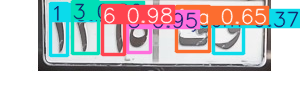

In [ ]:
img_path = '/content/WhatsApp Image 2025-04-20 at 16.50.21.jpeg'  # Update with your image path
img = Image.open(img_path)

# Perform inference on the image
results = model(img)

# Results is a list of results, so we can access the first (and only) result
result = results[0]

# Show the results with bounding boxes
result.show()  # Show the image with bounding boxes

# # Get prediction details in a pandas DataFrame (optional)
# predictions = result.pandas().xywh  # Extract prediction as a pandas DataFrame (xywh format)
# print(predictions)

# # Optionally, save the image with bounding boxes
# result.save()  # This will save the image with bounding boxes in the 'runs/detect/exp' folder


In [ ]:
# Initialize wandb for tracking the experiment
wandb.init(
    # Set the wandb project where this run will be logged
    project="yolo11ocr-car-plate",

    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.0002,
        "architecture": "yolov11n.pt",
        "dataset": "/content/egyptian-car-plates-13/data.yaml",  # Update to use your dataset path
        "epochs": 20,
    }
)

# Load the YOLOv11 model
model_ocr = YOLO("/content/yolo11ocr-car-plate/yolo11n_car_plate2/weights/best.pt")  # Use the correct model architecture file

# Define checkpoint directory and create it if it doesn't exist
checkpoint_dir = '/content/yolo_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Define checkpoint filename (saved after each epoch)
checkpoint_path = os.path.join(checkpoint_dir, "yolov11_checkpoint_epoch{epoch}.pt")

# Simulate training and log it to wandb
history = model_ocr.train(
    data='/content/egyptian-car-plates-13/data.yaml',  # Path to your data configuration file
    epochs=20,  # Number of epochs for training
    batch=32,  # Adjust based on your GPU memory
    imgsz=640,  # Image size (adjust as needed)
    cache=True,
    visualize=True,
    augment=True,
    name='yolo11n_car_plate',
    save=True,  # Ensure that weights are saved after each epoch
    save_period=1,  # Save weights after each epoch
    project="yolo11ocr-car-plate",  # Name of the wandb project
    save_dir=checkpoint_dir  # Specify the checkpoint directory
)

# End the wandb run after training is complete
wandb.finish()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: aahmedasd936 (aahmedasd936-helwan-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11ocr-car-plate/yolo11n_car_plate2/weights/best.pt, data=/content/egyptian-car-plates-13/data.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=1, cache=True, device=None, workers=8, project=yolo11ocr-car-plate, name=yolo11n_car_plate3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

train: Scanning /content/egyptian-car-plates-13/train/labels.cache... 5216 images, 4 backgrounds, 0 corrupt: 100%|██████████| 5216/5216 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (6.0GB RAM): 100%|██████████| 5216/5216 [00:09<00:00, 537.07it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.7±3.5 MB/s, size: 8.6 KB)


val: Scanning /content/egyptian-car-plates-13/valid/labels.cache... 745 images, 0 backgrounds, 0 corrupt: 100%|██████████| 745/745 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.9GB RAM): 100%|██████████| 745/745 [00:04<00:00, 172.08it/s]


Plotting labels to yolo11ocr-car-plate/yolo11n_car_plate3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000238, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolo11ocr-car-plate/yolo11n_car_plate3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.89G     0.5915     0.4311     0.9478        292        640: 100%|██████████| 163/163 [01:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        745       3894      0.976      0.975      0.987      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.67G     0.6339     0.4555     0.9621        260        640: 100%|██████████| 163/163 [01:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]

                   all        745       3894      0.974      0.978      0.986      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.68G     0.6424     0.4575     0.9636        334        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]

                   all        745       3894      0.956      0.971      0.982       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.68G     0.6634     0.4733     0.9689        286        640: 100%|██████████| 163/163 [01:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.05it/s]

                   all        745       3894      0.962      0.963      0.983      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.68G      0.658     0.4678     0.9706        280        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]

                   all        745       3894      0.974      0.972      0.985      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.68G     0.6555     0.4629     0.9694        319        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        745       3894      0.975      0.973      0.986      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.68G     0.6401     0.4487     0.9647        292        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]

                   all        745       3894      0.973       0.97      0.985      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.68G     0.6282     0.4382     0.9588        295        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]

                   all        745       3894      0.976      0.975      0.986       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.68G     0.6224     0.4379     0.9575        316        640: 100%|██████████| 163/163 [01:20<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]

                   all        745       3894      0.979      0.974      0.987       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.68G     0.6171     0.4324     0.9555        301        640: 100%|██████████| 163/163 [01:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]

                   all        745       3894      0.974      0.977      0.986      0.647


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.68G      1.216     0.5615      1.269        156        640: 100%|██████████| 163/163 [01:18<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]

                   all        745       3894       0.97       0.98      0.987      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       5.7G      1.188     0.5236      1.245        168        640: 100%|██████████| 163/163 [01:15<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]

                   all        745       3894      0.972      0.984      0.986      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.71G      1.164     0.5097      1.234        161        640: 100%|██████████| 163/163 [01:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]

                   all        745       3894      0.981      0.984      0.988      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.72G      1.146     0.4889      1.225        177        640: 100%|██████████| 163/163 [01:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]

                   all        745       3894      0.978      0.983      0.987      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.74G       1.13     0.4795      1.217        164        640: 100%|██████████| 163/163 [01:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]

                   all        745       3894       0.98      0.986      0.987       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.74G      1.113     0.4708       1.21        164        640: 100%|██████████| 163/163 [01:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]

                   all        745       3894       0.98      0.986      0.988      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.74G      1.097      0.461      1.197        173        640: 100%|██████████| 163/163 [01:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]

                   all        745       3894      0.978      0.983      0.986      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.74G      1.079      0.454       1.19        180        640: 100%|██████████| 163/163 [01:13<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]

                   all        745       3894      0.978      0.986      0.988      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.74G      1.071     0.4484      1.185        154        640: 100%|██████████| 163/163 [01:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]

                   all        745       3894       0.98      0.986      0.987      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.74G      1.054     0.4416      1.177        161        640: 100%|██████████| 163/163 [01:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]

                   all        745       3894       0.98      0.986      0.988      0.658



20 epochs completed in 0.477 hours.
Optimizer stripped from yolo11ocr-car-plate/yolo11n_car_plate3/weights/last.pt, 5.5MB
Optimizer stripped from yolo11ocr-car-plate/yolo11n_car_plate3/weights/best.pt, 5.5MB

Validating yolo11ocr-car-plate/yolo11n_car_plate3/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,589,562 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 2/12 [00:03<00:19,  1.99s/it]